In [5]:
import pandas as pd
from ipynb.fs.full.utils import custom_groupby, get_df, rename_values
from ipynb.fs.full.plots import heatmap

In [6]:
# get formatted and ready to use dataframe
df = get_df()

ValueError: Length mismatch: Expected axis has 202 elements, new values have 203 elements

In [ ]:
df.head(10)

In [4]:
# create a custom dataframe to handle only the columns that we want
d4_8_df = pd.DataFrame()
d4_8_df['Main Role'] = list(df['D4_Role'])
d4_8_df['Software Experience'] = list(df['D5_Software_Experience'])
d4_8_df['ML Experience'] = list(df['D6_ML_Experience'])
d4_8_df['ML Projects'] = list(df['D7_Total_ML_Projects'])
d4_8_df['ML Projects in Production'] = list(df['D8_ML_Production'])

In [5]:
# preprocessing d5 column
# remove those who didn't answered
d4_8_df = d4_8_df[d4_8_df['Software Experience'] != '-99']
# remove one outlier - 255 years is not valid
d4_8_df = d4_8_df[d4_8_df['Software Experience'] != '255']

In [6]:
# preprocessing d6 column
# remove those who didn't answered
d4_8_df = d4_8_df[d4_8_df['ML Experience'] != '-99']

In [7]:
# preprocessing d7 column
# remove those who didn't answered
d4_8_df = d4_8_df[d4_8_df['ML Projects'] != '-99']

In [8]:
# preprocessing d8 column
# remove those who didn't answered
d4_8_df = d4_8_df[d4_8_df['ML Projects in Production'] != '-99']

In [9]:
# convert column to integer - if you read before this line, you will get an string like '14'
d4_8_df = d4_8_df.astype({"Software Experience": int}, errors='raise') 
d4_8_df = d4_8_df.astype({"ML Experience": int}, errors='raise') 
d4_8_df = d4_8_df.astype({"ML Projects": int}, errors='raise') 
d4_8_df = d4_8_df.astype({"ML Projects in Production": int}, errors='raise') 

In [10]:
d4_8_df.head(10)

,Main Role,Software Experience,ML Experience,ML Projects,ML Projects in Production
0,Business Analyst,0,2,1,0
1,Business Analyst,2,2,1,1
2,Project Lead / Project Manager,20,5,5,1
3,Solution Architect,8,4,6,6
4,Data Scientist,6,3,23,18
5,Project Lead / Project Manager,6,5,2,0
6,Developer,5,2,3,0
7,"Other, which one?",40,15,5,1
10,"Other, which one?",6,1,2,0
11,Data Scientist,0,1,1,5


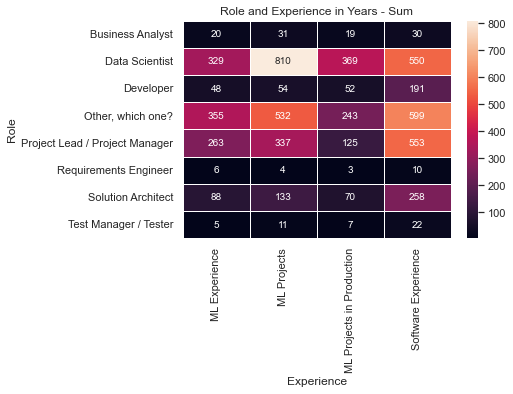

In [11]:
grouped_df = custom_groupby(d4_8_df, 'Main Role', 
                            ['Software Experience', 'ML Experience', 'ML Projects', 'ML Projects in Production'],
                            "Experience", "Role", "Years", "sum")
heatmap(grouped_df, 'Role', 'Experience', 'Years', title='Role and Experience in Years - Sum', fmt='d')

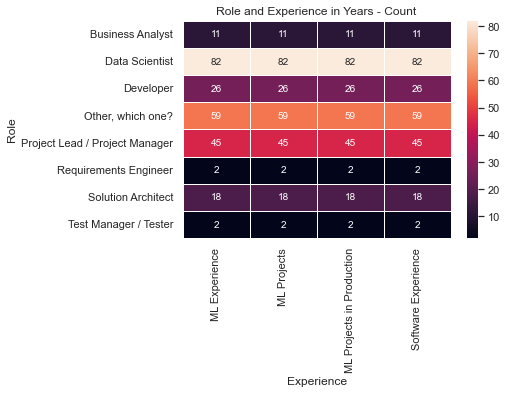

In [12]:
grouped_df = custom_groupby(d4_8_df, 'Main Role', 
                            ['Software Experience', 'ML Experience', 'ML Projects', 'ML Projects in Production'],
                            "Experience", "Role", "Years", "count")
heatmap(grouped_df, 'Role', 'Experience', 'Years', title='Role and Experience in Years - Count')

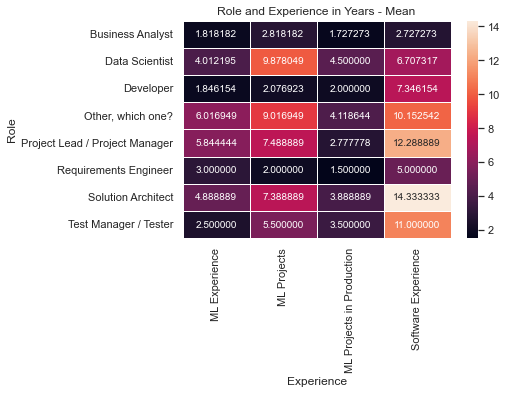

In [17]:
grouped_df = custom_groupby(d4_8_df, 'Main Role', 
                            ['Software Experience', 'ML Experience', 'ML Projects', 'ML Projects in Production'],
                            "Experience", "Role", "Years", "mean")
heatmap(grouped_df, 'Role', 'Experience', 'Years', title='Role and Experience in Years - Mean', fmt='f')

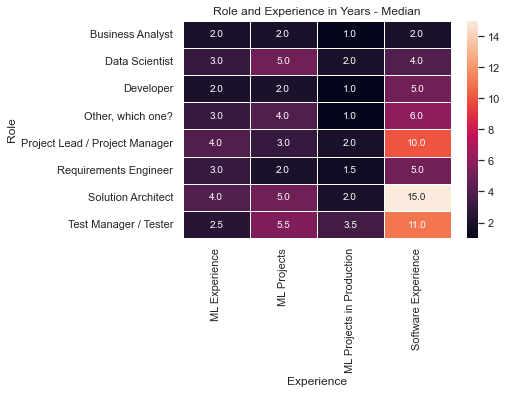

In [14]:
grouped_df = custom_groupby(d4_8_df, 'Main Role', 
                            ['Software Experience', 'ML Experience', 'ML Projects', 'ML Projects in Production'],
                            "Experience", "Role", "Years", "median")
heatmap(grouped_df, 'Role', 'Experience', 'Years', title='Role and Experience in Years - Median')